In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# nome do arquivo
Similaridade = 'DataBase_Full_TranspostosMF.txt' 
datasetSimilaridade = pd.read_csv(Similaridade,skiprows=0, delimiter=';') 

In [3]:
datasetSimilaridade.head(5)

,Id_Trilha,SaudeTrilha_Qualitativo,isolamento_QualItatIvo,NíveCurtoCirtuito_Qualitativo,EspessuraTrlha_Qualitativo,Isolamento_Quantitativo_mm,EspessuraTrlha__Quantitativo_mm,R_ATrilhaVsAIsolamento,absz_F_1000,absz_F_1090,...,phasez_F_2305154,phasez_F_2512253,phasez_F_2737957,phasez_F_2983939,phasez_F_3252021,phasez_F_3544187,phasez_F_3862602,phasez_F_4209624,phasez_F_4587823,phasez_F_5000000
0,I1_C0_T1,1.0,1.0,0.0,1.0,0.5,0.25,0.34,29861880.0,26342040.0,...,-74.88,-73.72,-72.41,-70.87,-69.16,-67.32,-65.28,-63.04,-60.51,-57.68
1,I1_C0_T10,1.0,1.0,0.0,10.0,0.5,2.50,2.35,21994040.0,19668020.0,...,-74.68,-73.53,-72.23,-70.71,-69.04,-67.22,-65.21,-62.98,-60.48,-57.68
2,I1_C0_T11,1.0,1.0,0.0,11.0,0.5,2.75,2.56,21055060.0,19771860.0,...,-74.83,-73.66,-72.37,-70.85,-69.17,-67.36,-65.34,-63.11,-60.60,-57.80
3,I1_C0_T12,1.0,1.0,0.0,12.0,0.5,3.00,2.84,20372560.0,20021260.0,...,-74.87,-73.69,-72.40,-70.88,-69.21,-67.37,-65.37,-63.14,-60.67,-57.83
4,I1_C0_T2,1.0,1.0,0.0,2.0,0.5,0.50,0.56,28020700.0,27911240.0,...,-74.96,-73.79,-72.49,-70.95,-69.24,-67.40,-65.36,-63.12,-60.60,-57.77


In [4]:
datasetSimilaridade.iloc[:,8:].head(3)

,absz_F_1000,absz_F_1090,absz_F_1188,absz_F_1294,absz_F_1411,absz_F_1538,absz_F_1676,absz_F_1826,absz_F_1990,absz_F_2169,...,phasez_F_2305154,phasez_F_2512253,phasez_F_2737957,phasez_F_2983939,phasez_F_3252021,phasez_F_3544187,phasez_F_3862602,phasez_F_4209624,phasez_F_4587823,phasez_F_5000000
0,29861880.0,26342040.0,27902100.0,25978220.0,21553040.0,20934960.0,18332540.0,16695300.0,14722040.0,13713760.0,...,-74.88,-73.72,-72.41,-70.87,-69.16,-67.32,-65.28,-63.04,-60.51,-57.68
1,21994040.0,19668020.0,18980320.0,16329420.0,15319600.0,14480780.0,13684840.0,11950220.0,11359120.0,10241612.0,...,-74.68,-73.53,-72.23,-70.71,-69.04,-67.22,-65.21,-62.98,-60.48,-57.68
2,21055060.0,19771860.0,18441100.0,16858920.0,14844460.0,14322360.0,13824660.0,12171060.0,11185240.0,10416880.0,...,-74.83,-73.66,-72.37,-70.85,-69.17,-67.36,-65.34,-63.11,-60.60,-57.80


In [5]:
scaler = StandardScaler()
df_scaled = datasetSimilaridade.iloc[:,8:].copy()
df_scaled.iloc[:, :] = StandardScaler().fit_transform( datasetSimilaridade.iloc[:,8:])

In [6]:
df_scaled.head(3)

,absz_F_1000,absz_F_1090,absz_F_1188,absz_F_1294,absz_F_1411,absz_F_1538,absz_F_1676,absz_F_1826,absz_F_1990,absz_F_2169,...,phasez_F_2305154,phasez_F_2512253,phasez_F_2737957,phasez_F_2983939,phasez_F_3252021,phasez_F_3544187,phasez_F_3862602,phasez_F_4209624,phasez_F_4587823,phasez_F_5000000
0,0.044539,-0.168580,0.573307,0.637450,0.213421,0.491939,0.256129,0.225734,-0.007183,0.033291,...,1.091349,1.125777,1.171608,1.198027,1.237869,1.243236,1.268364,1.284021,1.320690,1.319536
1,-1.166581,-1.300010,-1.136742,-1.447756,-1.362322,-1.271600,-1.227187,-1.432946,-1.314815,-1.446974,...,1.394007,1.391475,1.402715,1.386590,1.363209,1.340237,1.330631,1.330789,1.339024,1.319536
2,-1.311121,-1.282406,-1.240095,-1.333325,-1.482432,-1.314887,-1.182563,-1.355750,-1.382427,-1.372253,...,1.167013,1.209682,1.222965,1.221598,1.227424,1.204436,1.214992,1.229458,1.265687,1.264579


In [7]:
df_scaled = pd.concat([datasetSimilaridade.iloc[:,3],df_scaled],axis=1)
df_scaled = pd.concat([datasetSimilaridade.iloc[:,0],df_scaled],axis=1)
df_scaled.head(5)

,Id_Trilha,NíveCurtoCirtuito_Qualitativo,absz_F_1000,absz_F_1090,absz_F_1188,absz_F_1294,absz_F_1411,absz_F_1538,absz_F_1676,absz_F_1826,...,phasez_F_2305154,phasez_F_2512253,phasez_F_2737957,phasez_F_2983939,phasez_F_3252021,phasez_F_3544187,phasez_F_3862602,phasez_F_4209624,phasez_F_4587823,phasez_F_5000000
0,I1_C0_T1,0.0,0.044539,-0.168580,0.573307,0.637450,0.213421,0.491939,0.256129,0.225734,...,1.091349,1.125777,1.171608,1.198027,1.237869,1.243236,1.268364,1.284021,1.320690,1.319536
1,I1_C0_T10,0.0,-1.166581,-1.300010,-1.136742,-1.447756,-1.362322,-1.271600,-1.227187,-1.432946,...,1.394007,1.391475,1.402715,1.386590,1.363209,1.340237,1.330631,1.330789,1.339024,1.319536
2,I1_C0_T11,0.0,-1.311121,-1.282406,-1.240095,-1.333325,-1.482432,-1.314887,-1.182563,-1.355750,...,1.167013,1.209682,1.222965,1.221598,1.227424,1.204436,1.214992,1.229458,1.265687,1.264579
3,I1_C0_T12,0.0,-1.416180,-1.240126,-1.215304,-1.334229,-1.482518,-1.286006,-1.418569,-1.493734,...,1.106482,1.167730,1.184448,1.186242,1.185644,1.194736,1.188306,1.206074,1.222907,1.250840
4,I1_C0_T2,0.0,-0.238879,0.097443,0.010284,-0.554732,-0.192507,-0.114265,0.008335,-0.169798,...,0.970286,1.027889,1.068895,1.103746,1.154309,1.165636,1.197201,1.221664,1.265687,1.278318


In [9]:
#- ISOLAMENTO - 1
T1_1 = df_scaled.query('Id_Trilha=="I1_C0_T1" or Id_Trilha=="I1_C1_T1" or Id_Trilha=="I1_C2_T1" or Id_Trilha=="I1_C3_T1"')
T3_1 = df_scaled.query('Id_Trilha=="I1_C0_T3" or Id_Trilha=="I1_C1_T3" or Id_Trilha=="I1_C2_T3" or Id_Trilha=="I1_C3_T3" or Id_Trilha=="I1_C4_T3"')
T5_1 = df_scaled.query('Id_Trilha=="I1_C0_T5" or Id_Trilha=="I1_C1_T5" or Id_Trilha=="I1_C2_T5" or Id_Trilha=="I1_C3_T5" or Id_Trilha=="I1_C4_T5"')
T7_1 = df_scaled.query('Id_Trilha=="I1_C0_T7" or Id_Trilha=="I1_C1_T7" or Id_Trilha=="I1_C2_T7" or Id_Trilha=="I1_C3_T7" or Id_Trilha=="I1_C4_T7"')
T9_1 = df_scaled.query('Id_Trilha=="I1_C0_T9" or Id_Trilha=="I1_C1_T9" or Id_Trilha=="I1_C2_T9" or Id_Trilha=="I1_C3_T9" or Id_Trilha=="I1_C4_T9"')
T11_1 = df_scaled.query('Id_Trilha=="I1_C0_T11" or Id_Trilha=="I1_C1_T11" or Id_Trilha=="I1_C2_T11" or Id_Trilha=="I1_C3_T11" or Id_Trilha=="I1_C4_T11"')

#- ISOLAMENTO - 2
T1_2 = df_scaled.query('Id_Trilha=="I2_C0_T1" or Id_Trilha=="I2_C1_T1" or Id_Trilha=="I2_C2_T1" or Id_Trilha=="I2_C3_T1"')
T3_2 = df_scaled.query('Id_Trilha=="I2_C0_T3" or Id_Trilha=="I2_C1_T3" or Id_Trilha=="I2_C2_T3" or Id_Trilha=="I2_C3_T3" or Id_Trilha=="I2_C4_T3"')
T5_2 = df_scaled.query('Id_Trilha=="I2_C0_T5" or Id_Trilha=="I2_C1_T5" or Id_Trilha=="I2_C2_T5" or Id_Trilha=="I2_C3_T5" or Id_Trilha=="I2_C4_T5"')
T7_2 = df_scaled.query('Id_Trilha=="I2_C0_T7" or Id_Trilha=="I2_C1_T7" or Id_Trilha=="I2_C2_T7" or Id_Trilha=="I2_C3_T7" or Id_Trilha=="I2_C4_T7"')
T9_2 = df_scaled.query('Id_Trilha=="I2_C0_T9" or Id_Trilha=="I2_C1_T9" or Id_Trilha=="I2_C2_T9" or Id_Trilha=="I2_C3_T9" or Id_Trilha=="I2_C4_T9"')
T11_2 = df_scaled.query('Id_Trilha=="I2_C0_T11" or Id_Trilha=="I2_C1_T11" or Id_Trilha=="I2_C2_T11" or Id_Trilha=="I2_C3_T11" or Id_Trilha=="I2_C4_T11"')

#- ISOLAMENTO - 3
T1_3 = df_scaled.query('Id_Trilha=="I3_C0_T1" or Id_Trilha=="I3_C1_T1" or Id_Trilha=="I3_C2_T1" or Id_Trilha=="I3_C3_T1"')
T3_3 = df_scaled.query('Id_Trilha=="I3_C0_T3" or Id_Trilha=="I3_C1_T3" or Id_Trilha=="I3_C2_T3" or Id_Trilha=="I3_C3_T3" or Id_Trilha=="I3_C4_T3"')
T5_3 = df_scaled.query('Id_Trilha=="I3_C0_T5" or Id_Trilha=="I3_C1_T5" or Id_Trilha=="I3_C2_T5" or Id_Trilha=="I3_C3_T5" or Id_Trilha=="I3_C4_T5"')
T7_3 = df_scaled.query('Id_Trilha=="I3_C0_T7" or Id_Trilha=="I3_C1_T7" or Id_Trilha=="I3_C2_T7" or Id_Trilha=="I3_C3_T7" or Id_Trilha=="I3_C4_T7"')
T9_3 = df_scaled.query('Id_Trilha=="I3_C0_T9" or Id_Trilha=="I3_C1_T9" or Id_Trilha=="I3_C2_T9" or Id_Trilha=="I3_C3_T9" or Id_Trilha=="I3_C4_T9"')
T11_3 = df_scaled.query('Id_Trilha=="I3_C0_T11" or Id_Trilha=="I3_C1_T11" or Id_Trilha=="I3_C2_T11" or Id_Trilha=="I3_C3_T11" or Id_Trilha=="I3_C4_T11"')

In [10]:
# Parametros
method_V ='ward'
metric_V  = 'euclidean'

### Deve-se alterar os indices dos filtros para selecionar o range de frequência escolhido..

#### Ex: ...T1_3.iloc[:,1:]..


# MODULO E FASE

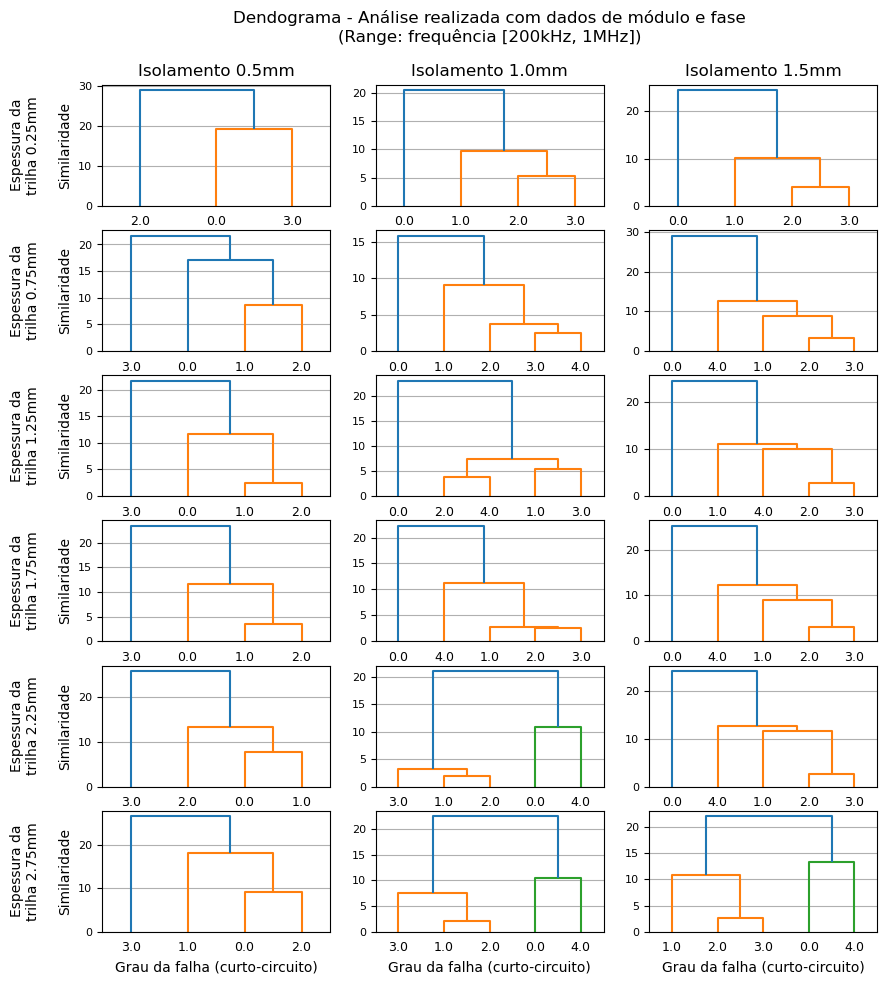

In [11]:
plt.figure(figsize=(10,11))


plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['xtick.labelsize'] = 8
#===================================================== 1
# 1 -
plt.subplot(6, 3, 1)
plt.title('Isolamento 0.5mm')
Z = hierarchy.linkage(T1_1.iloc[:,1:],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T1_1.iloc[:,1]),leaf_font_size=9)
plt.ylabel('Espessura da\ntrilha 0.25mm\n\nSimilaridade')
#
# 2 -
plt.subplot(6, 3, 2)
plt.title('Dendograma - Análise realizada com dados de módulo e fase\n(Range: frequência [200kHz, 1MHz])\n\nIsolamento 1.0mm')
Z = hierarchy.linkage(T1_2.iloc[:,1:],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T1_2.iloc[:,1]),leaf_font_size=9)
#
# 3 -
plt.subplot(6, 3, 3)
plt.title('Isolamento 1.5mm')
Z = hierarchy.linkage(T1_3.iloc[:,1:],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T1_3.iloc[:,1]),leaf_font_size=9)

#
#===================================================== 2
# 1 -
plt.subplot(6, 3, 4)
Z = hierarchy.linkage(T3_1.iloc[:,1:],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T3_1.iloc[:,1]),leaf_font_size=9)

plt.ylabel('Espessura da\ntrilha 0.75mm\n\nSimilaridade')
#
# 2 -
plt.subplot(6, 3, 5)
Z = hierarchy.linkage(T3_2.iloc[:,1:],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T3_2.iloc[:,1]),leaf_font_size=9)

#
# 3 -
plt.subplot(6, 3, 6)
Z = hierarchy.linkage(T3_3.iloc[:,1:],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T3_3.iloc[:,1]),leaf_font_size=9)

#
#
#===================================================== 3
# 1 -
plt.subplot(6, 3, 7)
Z = hierarchy.linkage(T5_1.iloc[:,1:],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T5_1.iloc[:,1]),leaf_font_size=9)

plt.ylabel('Espessura da\ntrilha 1.25mm\n\nSimilaridade')
#
# 2 -
plt.subplot(6, 3, 8)
Z = hierarchy.linkage(T5_2.iloc[:,1:],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T5_2.iloc[:,1]),leaf_font_size=9)

#
# 3 -
plt.subplot(6, 3, 9)
Z = hierarchy.linkage(T5_3.iloc[:,1:],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T5_3.iloc[:,1]),leaf_font_size=9)

#
#===================================================== 4
# 1 -
plt.subplot(6, 3, 10)
Z = hierarchy.linkage(T7_1.iloc[:,1:],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T7_1.iloc[:,1]),leaf_font_size=9)
plt.ylabel('Espessura da\ntrilha 1.75mm\n\nSimilaridade')
#
# 2 -
plt.subplot(6, 3, 11)
Z = hierarchy.linkage(T7_2.iloc[:,1:],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T7_2.iloc[:,1]),leaf_font_size=9)

#
# 3 -
plt.subplot(6, 3, 12)
Z = hierarchy.linkage(T7_3.iloc[:,1:],method=method_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T7_3.iloc[:,1]),leaf_font_size=9)

#
#===================================================== 5
# 1 -
plt.subplot(6, 3, 13)
Z = hierarchy.linkage(T9_1.iloc[:,1:],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T9_1.iloc[:,1]),leaf_font_size=9)

plt.ylabel('Espessura da\ntrilha 2.25mm\n\nSimilaridade')
#
# 2 -
plt.subplot(6, 3, 14)
Z = hierarchy.linkage(T9_2.iloc[:,1:],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T9_2.iloc[:,1]),leaf_font_size=9)

#
# 3 -
plt.subplot(6, 3, 15)
Z = hierarchy.linkage(T9_3.iloc[:,1:],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T9_3.iloc[:,1]),leaf_font_size=9)

#
#===================================================== 6
# 1 -
plt.subplot(6, 3, 16)
Z = hierarchy.linkage(T11_1.iloc[:,1:],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T11_1.iloc[:,1]),leaf_font_size=9)
plt.xlabel('Grau da falha (curto-circuito)')
plt.ylabel('Espessura da\ntrilha 2.75mm\n\nSimilaridade')
#
# 2 -
plt.subplot(6, 3, 17)
Z = hierarchy.linkage(T11_2.iloc[:,1:],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T11_2.iloc[:,1]),leaf_font_size=9)
plt.xlabel('Grau da falha (curto-circuito)')
#
# 3 -
plt.subplot(6, 3, 18)
Z = hierarchy.linkage(T11_3.iloc[:,1:],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T11_3.iloc[:,1]),leaf_font_size=9)
plt.xlabel('Grau da falha (curto-circuito)')
#

plt.show()

In [14]:
T1_1.iloc[:,2:102] # modulo
# ^ esse valor acima deve ser alterado no código por exeçho '.iloc[:,2:102]'
# RANGE DE 1KhZ - 5Mhz

,absz_F_1000,absz_F_1090,absz_F_1188,absz_F_1294,absz_F_1411,absz_F_1538,absz_F_1676,absz_F_1826,absz_F_1990,absz_F_2169,...,absz_F_2305154,absz_F_2512253,absz_F_2737957,absz_F_2983939,absz_F_3252021,absz_F_3544187,absz_F_3862602,absz_F_4209624,absz_F_4587823,absz_F_5000000
0,0.044539,-0.168580,0.573307,0.637450,0.213421,0.491939,0.256129,0.225734,-0.007183,0.033291,...,-0.200132,-0.206646,-0.213208,-0.220699,-0.232283,-0.238298,-0.255857,-0.280286,-0.300880,-0.243307
17,1.076103,1.000343,1.274299,0.755321,1.251043,1.341628,1.290082,1.386035,1.483017,1.565513,...,2.771987,2.783721,2.778224,2.784049,2.822217,2.830755,2.899473,2.997933,3.045322,2.766391
23,1.649540,1.370869,1.349667,1.400362,2.032205,1.916924,2.025666,1.710152,1.798995,1.723526,...,1.463781,1.462426,1.462428,1.463672,1.462976,1.455333,1.450250,1.445207,1.433954,1.380204


In [16]:
T1_1.iloc[:,102:] # fase 
# ^ esse valor acima deve ser alterado no código por exeçho '.iloc[:,102:]'
# RANGE DE 1KhZ - 5Mhz

,phasez_F_1000,phasez_F_1090,phasez_F_1188,phasez_F_1294,phasez_F_1411,phasez_F_1538,phasez_F_1676,phasez_F_1826,phasez_F_1990,phasez_F_2169,...,phasez_F_2305154,phasez_F_2512253,phasez_F_2737957,phasez_F_2983939,phasez_F_3252021,phasez_F_3544187,phasez_F_3862602,phasez_F_4209624,phasez_F_4587823,phasez_F_5000000
0,0.559186,-1.021776,-0.138955,0.014902,-0.290984,-0.099096,-0.268355,0.066565,0.158164,-0.061207,...,1.091349,1.125777,1.171608,1.198027,1.237869,1.243236,1.268364,1.284021,1.320690,1.319536
17,0.891869,0.758842,0.998811,0.912720,0.961713,1.104811,0.605859,0.877365,1.305759,0.912411,...,-0.391675,-0.622233,-0.741440,-0.593319,-0.610903,-0.463972,-0.421741,-0.617873,-1.209451,-1.533628
23,-1.445106,-0.919124,-1.347499,-1.630168,-0.905978,-0.114756,-0.724559,-1.194209,-0.980413,-0.531789,...,-0.891061,-0.887931,-0.882671,-0.876163,-0.872029,-0.871374,-0.875401,-0.890686,-0.922213,-0.883308


#  FASE

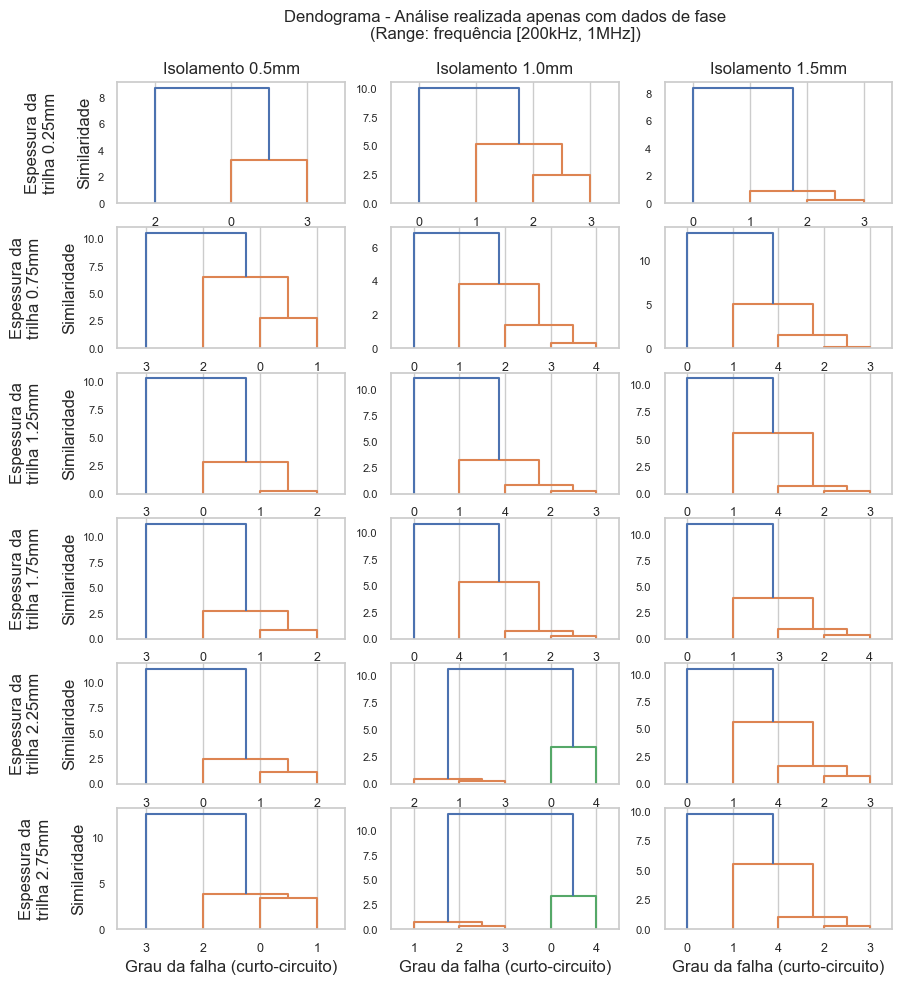

In [125]:
plt.figure(figsize=(10,11))


plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['xtick.labelsize'] = 8
#===================================================== 1
# 1 -
plt.subplot(6, 3, 1)
plt.title('Isolamento 0.5mm')
Z = hierarchy.linkage(T1_1.iloc[:,16:],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T1_1.iloc[:,1]),leaf_font_size=9)
plt.ylabel('Espessura da\ntrilha 0.25mm\n\nSimilaridade')
#
# 2 -
plt.subplot(6, 3, 2)
plt.title('Dendograma - Análise realizada apenas com dados de fase\n(Range: frequência [200kHz, 1MHz])\n\nIsolamento 1.0mm')
Z = hierarchy.linkage(T1_2.iloc[:,16:],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T1_2.iloc[:,1]),leaf_font_size=9)
#
# 3 -
plt.subplot(6, 3, 3)
plt.title('Isolamento 1.5mm')
Z = hierarchy.linkage(T1_3.iloc[:,16:],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T1_3.iloc[:,1]),leaf_font_size=9)

#
#===================================================== 2
# 1 -
plt.subplot(6, 3, 4)
Z = hierarchy.linkage(T3_1.iloc[:,16:],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T3_1.iloc[:,1]),leaf_font_size=9)

plt.ylabel('Espessura da\ntrilha 0.75mm\n\nSimilaridade')
#
# 2 -
plt.subplot(6, 3, 5)
Z = hierarchy.linkage(T3_2.iloc[:,16:],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T3_2.iloc[:,1]),leaf_font_size=9)

#
# 3 -
plt.subplot(6, 3, 6)
Z = hierarchy.linkage(T3_3.iloc[:,16:],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T3_3.iloc[:,1]),leaf_font_size=9)

#
#
#===================================================== 3
# 1 -
plt.subplot(6, 3, 7)
Z = hierarchy.linkage(T5_1.iloc[:,16:],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T5_1.iloc[:,1]),leaf_font_size=9)

plt.ylabel('Espessura da\ntrilha 1.25mm\n\nSimilaridade')
#
# 2 -
plt.subplot(6, 3, 8)
Z = hierarchy.linkage(T5_2.iloc[:,16:],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T5_2.iloc[:,1]),leaf_font_size=9)

#
# 3 -
plt.subplot(6, 3, 9)
Z = hierarchy.linkage(T5_3.iloc[:,16:],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T5_3.iloc[:,1]),leaf_font_size=9)

#
#===================================================== 4
# 1 -
plt.subplot(6, 3, 10)
Z = hierarchy.linkage(T7_1.iloc[:,16:],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T7_1.iloc[:,1]),leaf_font_size=9)
plt.ylabel('Espessura da\ntrilha 1.75mm\n\nSimilaridade')
#
# 2 -
plt.subplot(6, 3, 11)
Z = hierarchy.linkage(T7_2.iloc[:,16:],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T7_2.iloc[:,1]),leaf_font_size=9)

#
# 3 -
plt.subplot(6, 3, 12)
Z = hierarchy.linkage(T7_3.iloc[:,16:],method=method_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T7_3.iloc[:,1]),leaf_font_size=9)

#
#===================================================== 5
# 1 -
plt.subplot(6, 3, 13)
Z = hierarchy.linkage(T9_1.iloc[:,16:],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T9_1.iloc[:,1]),leaf_font_size=9)

plt.ylabel('Espessura da\ntrilha 2.25mm\n\nSimilaridade')
#
# 2 -
plt.subplot(6, 3, 14)
Z = hierarchy.linkage(T9_2.iloc[:,16:],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T9_2.iloc[:,1]),leaf_font_size=9)

#
# 3 -
plt.subplot(6, 3, 15)
Z = hierarchy.linkage(T9_3.iloc[:,16:],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T9_3.iloc[:,1]),leaf_font_size=9)

#
#===================================================== 6
# 1 -
plt.subplot(6, 3, 16)
Z = hierarchy.linkage(T11_1.iloc[:,16:],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T11_1.iloc[:,1]),leaf_font_size=9)
plt.xlabel('Grau da falha (curto-circuito)')
plt.ylabel('Espessura da\ntrilha 2.75mm\n\nSimilaridade')
#
# 2 -
plt.subplot(6, 3, 17)
Z = hierarchy.linkage(T11_2.iloc[:,16:],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T11_2.iloc[:,1]),leaf_font_size=9)
plt.xlabel('Grau da falha (curto-circuito)')
#
# 3 -
plt.subplot(6, 3, 18)
Z = hierarchy.linkage(T11_3.iloc[:,16:],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T11_3.iloc[:,1]),leaf_font_size=9)
plt.xlabel('Grau da falha (curto-circuito)')
#

plt.show()

In [99]:
T11_2.iloc[:,20:]

,F_1062747,F_1158226,F_1262283,F_1375688,F_1499282,F_1633980,F_1780779,F_1940767,F_2115128,F_2305154,F_2512253,F_2737957,F_2983939,F_3252021,F_3544187,F_3862602,F_4209624,F_4587823,F_5000000
31,1.394399,1.379386,1.378422,1.368320,1.358061,1.347258,1.322606,1.324602,1.310743,1.303209,1.307571,1.300001,1.280524,1.248314,1.223836,1.214992,1.221664,1.241241,1.218782
42,-0.750950,-0.776438,-0.759353,-0.778388,-0.776035,-0.788242,-0.781189,-0.793202,-0.777016,-0.769997,-0.762074,-0.741440,-0.770097,-0.778024,-0.803474,-0.813134,-0.789355,-0.744981,-0.690960
48,-0.830407,-0.852526,-0.855433,-0.869737,-0.883818,-0.888973,-0.893892,-0.880715,-0.874880,-0.875928,-0.859962,-0.831314,-0.864378,-0.872029,-0.900474,-0.893192,-0.867302,-0.818318,-0.745916
54,-0.962836,-0.979339,-0.975533,-1.006761,-1.013157,-1.009851,-1.006595,-1.003232,-1.005365,-0.981858,-0.943867,-0.921189,-0.958660,-0.945145,-0.978074,-0.982145,-0.953043,-0.842764,-0.713858
60,0.149567,0.085892,-0.014735,-0.070431,-0.150896,-0.204002,-0.255240,-0.320634,-0.352940,-0.391675,-0.412472,-0.433298,-0.510823,-0.548233,-0.619173,-0.635228,-0.649052,-0.628863,-0.608525


# MODULO

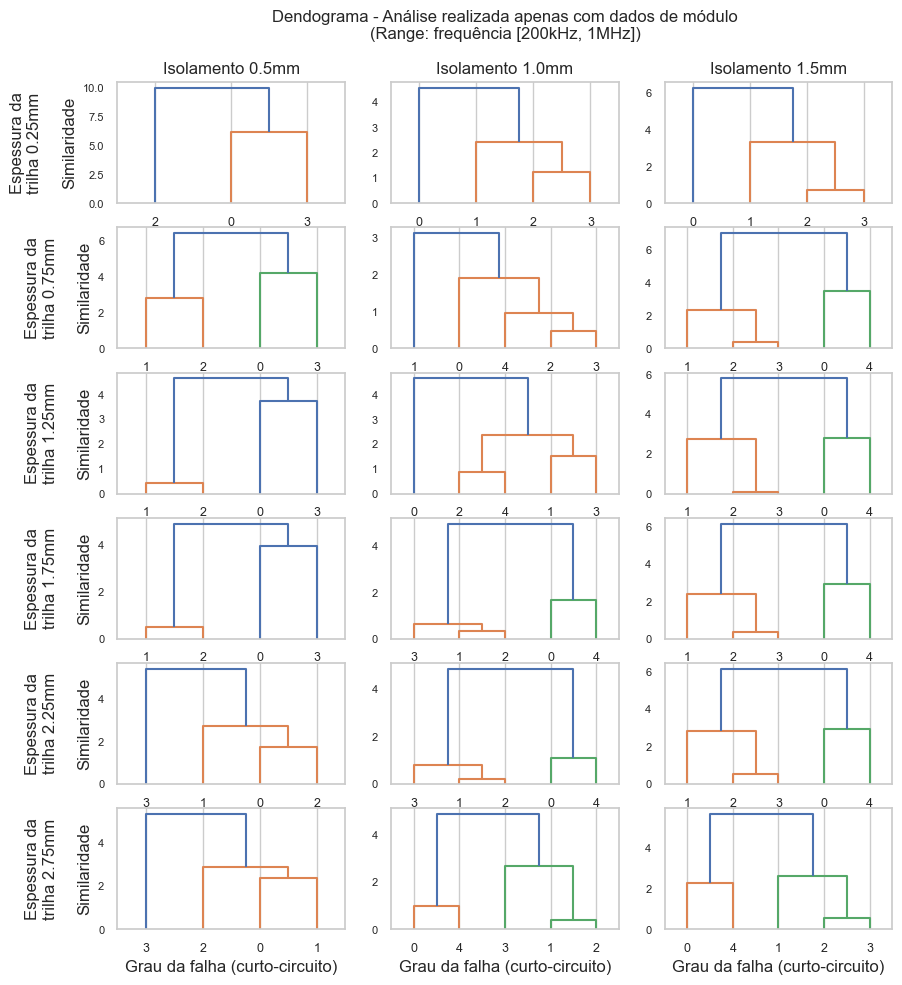

In [124]:
plt.figure(figsize=(10,11))


plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['xtick.labelsize'] = 8
#===================================================== 1
# 1 -
plt.subplot(6, 3, 1)
plt.title('Isolamento 0.5mm')
Z = hierarchy.linkage(T1_1.iloc[:,2:20],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T1_1.iloc[:,1]),leaf_font_size=9)
plt.ylabel('Espessura da\ntrilha 0.25mm\n\nSimilaridade')
#
# 2 -
plt.subplot(6, 3, 2)
plt.title('Dendograma - Análise realizada apenas com dados de módulo\n(Range: frequência [200kHz, 1MHz])\n\nIsolamento 1.0mm')
Z = hierarchy.linkage(T1_2.iloc[:,2:20],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T1_2.iloc[:,1]),leaf_font_size=9)
#
# 3 -
plt.subplot(6, 3, 3)
plt.title('Isolamento 1.5mm')
Z = hierarchy.linkage(T1_3.iloc[:,2:20],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T1_3.iloc[:,1]),leaf_font_size=9)

#
#===================================================== 2
# 1 -
plt.subplot(6, 3, 4)
Z = hierarchy.linkage(T3_1.iloc[:,2:20],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T3_1.iloc[:,1]),leaf_font_size=9)

plt.ylabel('Espessura da\ntrilha 0.75mm\n\nSimilaridade')
#
# 2 -
plt.subplot(6, 3, 5)
Z = hierarchy.linkage(T3_2.iloc[:,2:20],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T3_2.iloc[:,1]),leaf_font_size=9)

#
# 3 -
plt.subplot(6, 3, 6)
Z = hierarchy.linkage(T3_3.iloc[:,2:20],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T3_3.iloc[:,1]),leaf_font_size=9)

#
#
#===================================================== 3
# 1 -
plt.subplot(6, 3, 7)
Z = hierarchy.linkage(T5_1.iloc[:,2:20],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T5_1.iloc[:,1]),leaf_font_size=9)

plt.ylabel('Espessura da\ntrilha 1.25mm\n\nSimilaridade')
#
# 2 -
plt.subplot(6, 3, 8)
Z = hierarchy.linkage(T5_2.iloc[:,2:20],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T5_2.iloc[:,1]),leaf_font_size=9)

#
# 3 -
plt.subplot(6, 3, 9)
Z = hierarchy.linkage(T5_3.iloc[:,2:20],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T5_3.iloc[:,1]),leaf_font_size=9)

#
#===================================================== 4
# 1 -
plt.subplot(6, 3, 10)
Z = hierarchy.linkage(T7_1.iloc[:,2:20],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T7_1.iloc[:,1]),leaf_font_size=9)
plt.ylabel('Espessura da\ntrilha 1.75mm\n\nSimilaridade')
#
# 2 -
plt.subplot(6, 3, 11)
Z = hierarchy.linkage(T7_2.iloc[:,2:20],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T7_2.iloc[:,1]),leaf_font_size=9)

#
# 3 -
plt.subplot(6, 3, 12)
Z = hierarchy.linkage(T7_3.iloc[:,2:20],method=method_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T7_3.iloc[:,1]),leaf_font_size=9)

#
#===================================================== 5
# 1 -
plt.subplot(6, 3, 13)
Z = hierarchy.linkage(T9_1.iloc[:,2:20],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T9_1.iloc[:,1]),leaf_font_size=9)

plt.ylabel('Espessura da\ntrilha 2.25mm\n\nSimilaridade')
#
# 2 -
plt.subplot(6, 3, 14)
Z = hierarchy.linkage(T9_2.iloc[:,2:20],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T9_2.iloc[:,1]),leaf_font_size=9)

#
# 3 -
plt.subplot(6, 3, 15)
Z = hierarchy.linkage(T9_3.iloc[:,2:20],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T9_3.iloc[:,1]),leaf_font_size=9)

#
#===================================================== 6
# 1 -
plt.subplot(6, 3, 16)
Z = hierarchy.linkage(T11_1.iloc[:,2:20],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T11_1.iloc[:,1]),leaf_font_size=9)
plt.xlabel('Grau da falha (curto-circuito)')
plt.ylabel('Espessura da\ntrilha 2.75mm\n\nSimilaridade')
#
# 2 -
plt.subplot(6, 3, 17)
Z = hierarchy.linkage(T11_2.iloc[:,2:20],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T11_2.iloc[:,1]),leaf_font_size=9)
plt.xlabel('Grau da falha (curto-circuito)')
#
# 3 -
plt.subplot(6, 3, 18)
Z = hierarchy.linkage(T11_3.iloc[:,2:20],method=method_V,metric=metric_V)
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(T11_3.iloc[:,1]),leaf_font_size=9)
plt.xlabel('Grau da falha (curto-circuito)')
#

plt.show()